In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

#Data Load
file_path = r'C:\Users\CHOI.DESKTOP-R51MDOU\OneDrive - 가천대학교\바탕 화면\Coding\AI Introduction\wine.csv'
df = pd.read_csv(file_path)

#데이터 시각화
display(df)
print(df.columns)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')


In [4]:
#결측치에 대한 확인
missing_values = df.isnull().sum()

print(missing_values)

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


In [5]:
#특성과 타겟 분리 (특성 : X, 타겟 : y)
X = df.drop('Wine', axis = 1)
y = df['Wine']

#trained data와 test data 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=12)


print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(142, 13) (142,)
(36, 13) (36,)


In [6]:
#model 정의
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}


Random Forest 정확도: 0.9722
Random Forest conf matrix:
[[14  0  0]
 [ 0 10  1]
 [ 0  0 11]]


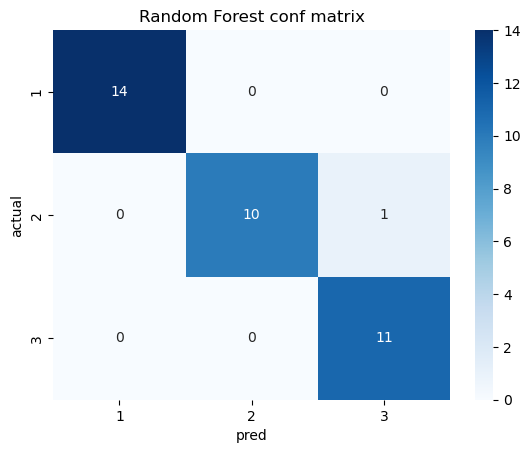


Decision Tree 정확도: 0.9167
Decision Tree conf matrix:
[[14  0  0]
 [ 1 10  0]
 [ 2  0  9]]


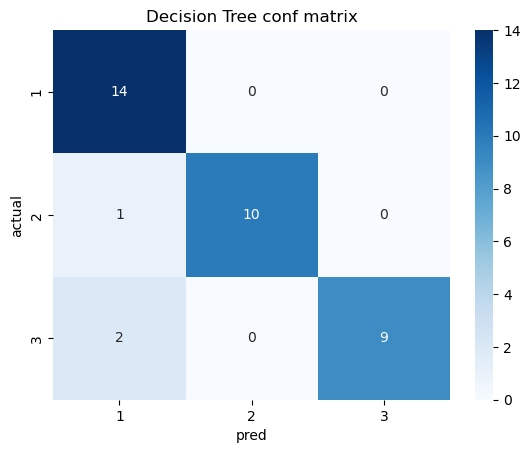

C:\Users\CHOI.DESKTOP-R51MDOU\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression 정확도: 0.9722
Logistic Regression conf matrix:
[[14  0  0]
 [ 0 10  1]
 [ 0  0 11]]


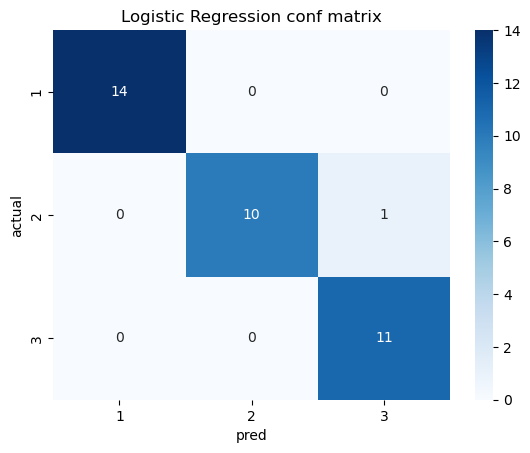


K-Nearest Neighbors 정확도: 0.7222
K-Nearest Neighbors conf matrix:
[[14  0  0]
 [ 1  7  3]
 [ 1  5  5]]


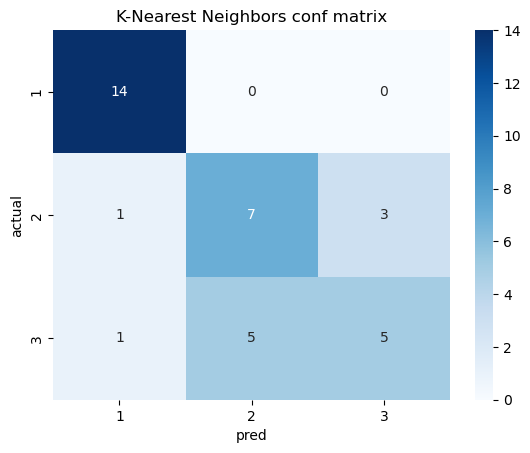


Support Vector Machine 정확도: 0.6389
Support Vector Machine conf matrix:
[[12  0  2]
 [ 0 11  0]
 [ 0 11  0]]


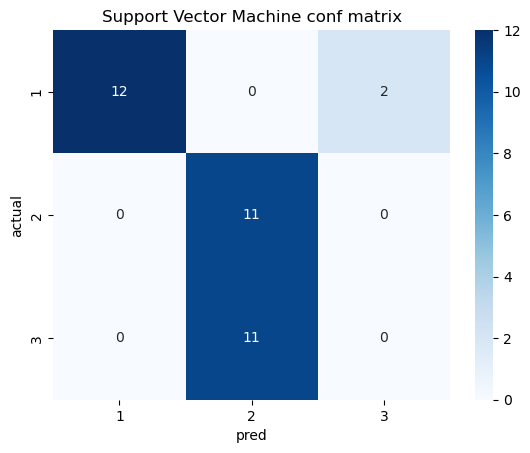

In [7]:
#model 학습 및 평가
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"\n{model_name} 정확도: {accuracy:.4f}")
    print(f"{model_name} conf matrix:\n{conf_matrix}")
    
# 혼동 행렬 시각화
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['1', '2', '3'], 
                yticklabels=['1', '2', '3'])
    plt.title(f"{model_name} conf matrix")
    plt.xlabel('pred')
    plt.ylabel('actual')
    plt.show()

In [8]:
Y = pd.get_dummies(y).values

In [9]:
X = X.values

In [10]:
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 0)

In [50]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(10, input_shape = (13,), activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(Adam(learning_rate = 0.01), 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 10)                  │             140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 15)                  │             165 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 20)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 20)                  │             420 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 3)                   │              63 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,108 (4.33 KB)

 Trainable params: 1,108 (4.33 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
model_history = model.fit(x = X_train, y = y_train, epochs = 30, batch_size = 23, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9293 - loss: 0.1410 - val_accuracy: 0.9722 - val_loss: 0.1135
Epoch 2/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9404 - loss: 0.1748 - val_accuracy: 0.8333 - val_loss: 0.2594
Epoch 3/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9602 - loss: 0.1473 - val_accuracy: 0.8889 - val_loss: 0.2476
Epoch 4/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8122 - loss: 0.6354 - val_accuracy: 0.5833 - val_loss: 0.9181
Epoch 5/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7419 - loss: 0.7940 - val_accuracy: 0.8611 - val_loss: 0.2334
Epoch 6/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8373 - loss: 0.2892 - val_accuracy: 0.8889 - val_loss: 0.2920
Epoch 7/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8252 - loss: 0.4543 - val_accuracy: 0.8333 - val_loss: 0.2371
Epoch 8/30
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8458 - loss: 0.3374 - val_accuracy: 0.9722 - val_loss: 0.1444


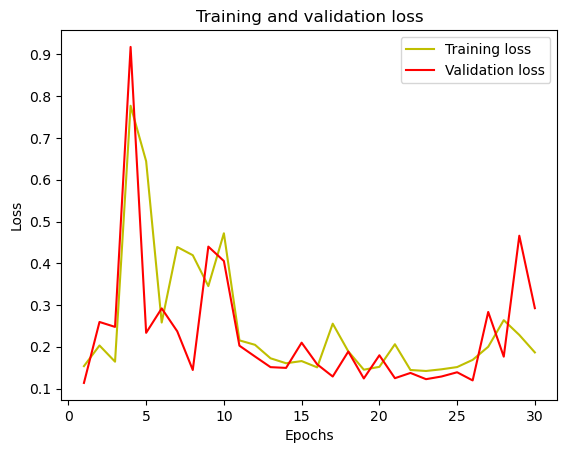

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

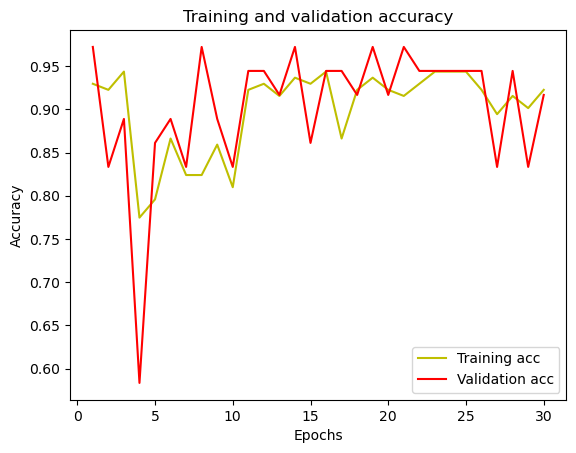

In [65]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label = 'Training acc')
plt.plot(epochs, val_acc, 'r', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()